## Importing the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

In [2]:
#Importing the combined dataset
datacomb=pd.read_csv("../Coursework/datacomb.csv")

In [3]:
#Removing the unnamed column
datacomb = datacomb.iloc[:,1:]
#Checking the head of"datacomb"
datacomb.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,NaN,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,NaN,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,NaN,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,NaN,0,0,0,0,0,0


In [4]:
#Checking the datatypes of columns in "datacomb"
datacomb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14595103 entries, 0 to 14595102
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay    

In [5]:
#Checking for missing values in "datacomb"
pd.isnull(datacomb).sum(axis=0)

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                282682
CRSDepTime                  0
ArrTime                316046
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                    22
ActualElapsedTime      316046
CRSElapsedTime            998
AirTime                316046
ArrDelay               316046
DepDelay               282682
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     14312420
Diverted                    0
CarrierDelay                0
WeatherDelay                0
NASDelay                    0
SecurityDelay               0
LateAircraftDelay           0
dtype: int64

Missing values from "DepDelay"and "ArrDelay are only removed for now

In [6]:
#Removing missing values from 'DepDelay' column
datacomb=datacomb[pd.notnull(datacomb['DepDelay'])]
#Removing missing values from 'ArrDelay' column
datacomb=datacomb[pd.notnull(datacomb['ArrDelay'])]

<AxesSubplot:>

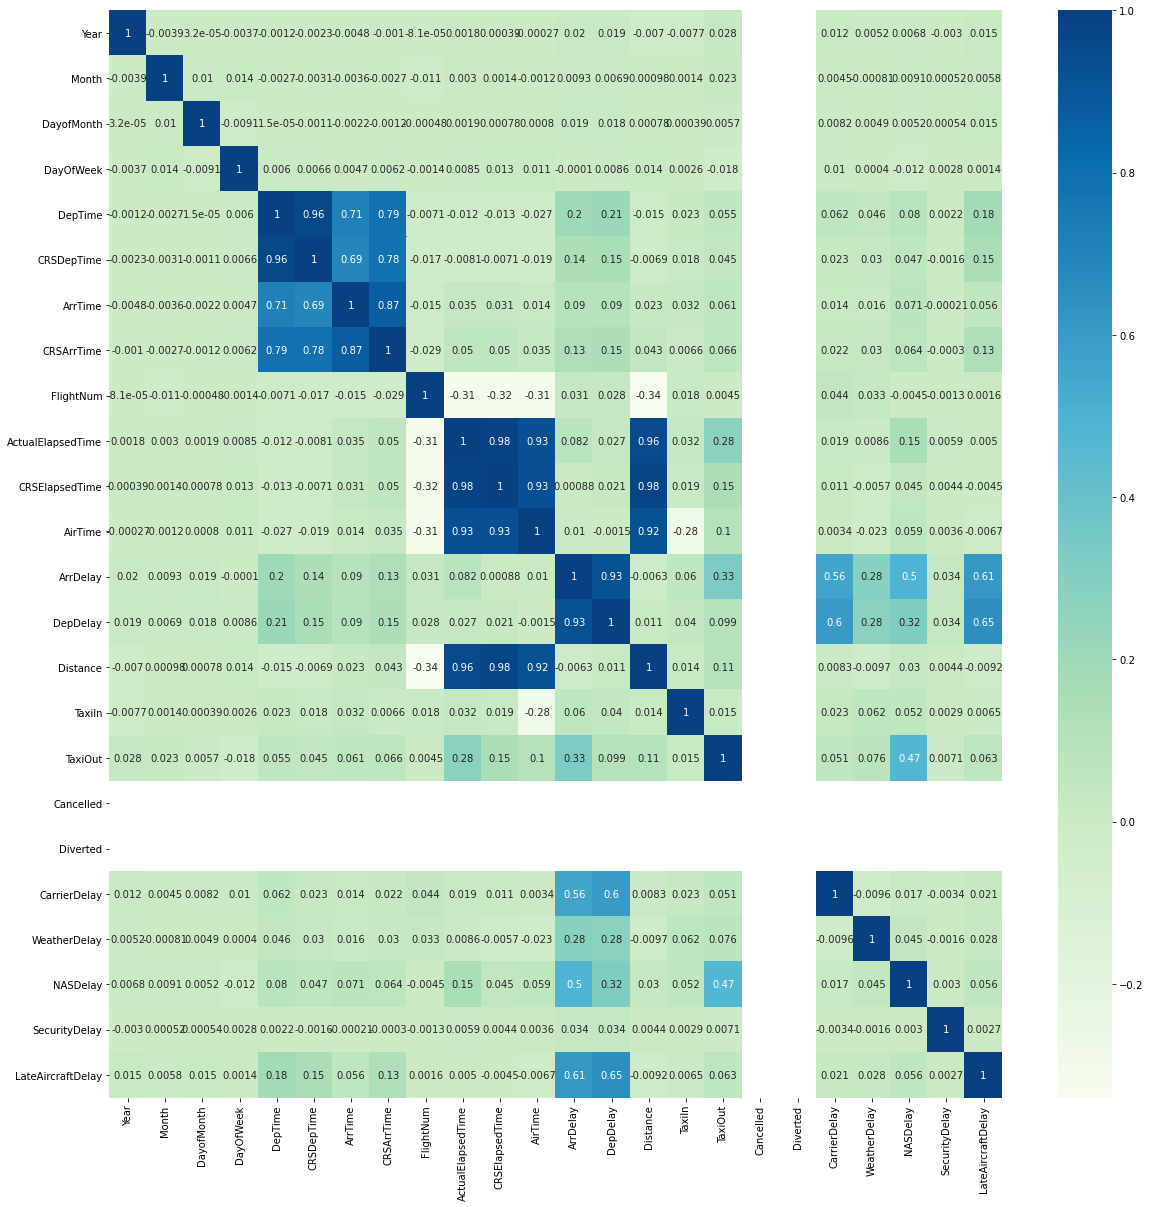

In [10]:
#Checking for correlation between the variables in the combined dataset
plt.figure(figsize=(20,20))
correlation = datacomb.corr()
sns.heatmap(correlation,cmap='GnBu',annot=True)

Month,DayofMonth, DayOfWeek, CRSDepTime,DepDelay and LateAircraftDelay are used as explanatory variables to predict "ArrDelay" 

In [7]:
#Giving the features of the model
X = datacomb.iloc[:,[1,2,3,5,15,28]]
y = datacomb['ArrDelay']

In [8]:
#spliting data to train test split(70% training set and 30% testing set)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [9]:
#Viewing "X"
X.head()

,Month,DayofMonth,DayOfWeek,CRSDepTime,DepDelay,LateAircraftDelay
0,1,11,3,745,-2.0,0
1,1,11,3,1053,0.0,0
2,1,11,3,1915,0.0,0
3,1,11,3,1755,-2.0,0
4,1,11,3,832,-8.0,0


In [10]:
#Creating a variable containing the columns of the explanatory variables of the training set 
X_cols = X_train.columns

In [11]:
#Scaling the columns of the training and testing datasets to make all the explanatory variables into the same unit
scaler = MinMaxScaler()
data_train = scaler.fit_transform(X_train)
data_test = scaler.transform(X_test)

X_train = pd.DataFrame(data=data_train,columns=X_cols)
X_test = pd.DataFrame(data=data_test,columns=X_cols)

In [12]:
#Viewing the top 5 rows of the scaled training dataset
X_train.head()

,Month,DayofMonth,DayOfWeek,CRSDepTime,DepDelay,LateAircraftDelay
0,1.000000,0.400000,0.333333,0.485157,0.316316,0.000000
1,0.727273,0.566667,0.166667,0.697201,0.314211,0.000000
2,0.818182,0.466667,0.000000,0.561917,0.316579,0.000000
3,0.272727,0.000000,1.000000,0.684478,0.327632,0.013177
4,0.909091,0.500000,0.666667,0.688719,0.340526,0.068082


In [13]:
#Building the multiple linear regression model
model = LinearRegression()
#Using the training set to create a linear regression model
model.fit(X_train,y_train)

LinearRegression()

In [14]:
#Checking the coefficients in the model
coef = model.coef_
coef

array([ 3.52637685e-01,  2.10779326e-01, -9.02010907e-01, -9.25515018e-01,
        3.79384922e+03,  4.81912731e+01])

In [15]:
#Finding the Accuracy of the testing data using R squared
model.score(X_test,y_test)

0.8577843083573524

In [16]:
#Finding the predicted values of Y using testing data of X through the regression model
y_pred = model.predict(X_test)

(-25.0, 30.0)

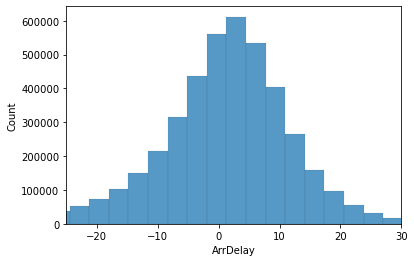

In [17]:
#Plotting the error distribution to check whether the errors are normally distributed
plt.figure()
sns.histplot((y_pred-y_test),bins=500)
plt.xlim([-25,30])

The errors seem to be normally distributed

In [26]:
print("MSE: ",mean_squared_error(y_test, y_pred))
print("MAE: ",mean_absolute_error(y_test, y_pred))
print("RMSE: ",math.sqrt(mean_squared_error(y_test, y_pred)))
print("R squared",round(model.score(X_test,y_test),2))

MSE:  205.8311065380408
MAE:  9.286270201254785
RMSE:  14.346815205405024
R squared 0.86


The model seems to be a good fit for predicting delays based on the R squared value